# An Introduction to Copulas

Understanding the dependence between variables is useful in answering many questions about the relationship between variables. Correlations of joint distributions of random variables is one way of determining this relationship. However, at high dimensions this becomes difficult. Copulas are a tool which can be used to model this relationship, addressing some of the issues associated with dependence modelling in various applications, by using the joint distribution of marginal distributions of the random variables instead. Copulas allow for teh study of the dependence between random variables and also constructing families of multivariate distributions.

Copulas are joint distribution functions of marginals of random variables. Particularly, it is useful for multivariate distributions and separate information about the dependence structure and the marginal distributions. Additionally, the dependence is not always constant across the distribution, and copulas are flexible and are able to model tail dependencies. Guided by the Introduction to Copulas <a name="ref-1"/>[(Nelsen, 2007)](#cite-nelsen2007introduction), the conditions for copulas, the various families of copulas and its applications are discussed in the following report. 

# Background

A joint probability distribution gives the probabilities that two variables occur. For example, if given the variables, height and weight, the joint probability of the two variables would be used to answer questions relating to - the probability of a person being of height 150-170cm and of weight 50-60kg. The joing probability distribution function of the random variables $X$ and $Y$ can be expressed by:

$$ F_{XY}(x,y) = P(X \leq x, Y \leq y) $$

Examining the relationship between two variables may be approached, using for example, correlation techniques, however as the number of dimensions increase, the joint probability becomes difficult to be meaningful. Furthermore, the relationship between variables may not always be consistent and dependence may differ, for example in the tail ends of the distributions. 

Copulas aim to model the dependence between random variables. It can be defined as the joint distribution of marginal distributions of random variables, where the the marginal distribution is in the domain [0,1]. In Example 1.1, provides the definition of a copula. 

**Example 1.1**

If $X$ and $Y$ are random continuous variables, the marginal cumulative distribution function, would be a continuous function $F(x)$ and $G(y)$ respectively.

$$ F(x) = P[X \leq x] $$
$$ G(y) = P[Y \leq y] $$

1.0000000,0.6978169
0.6978169,1.0000000


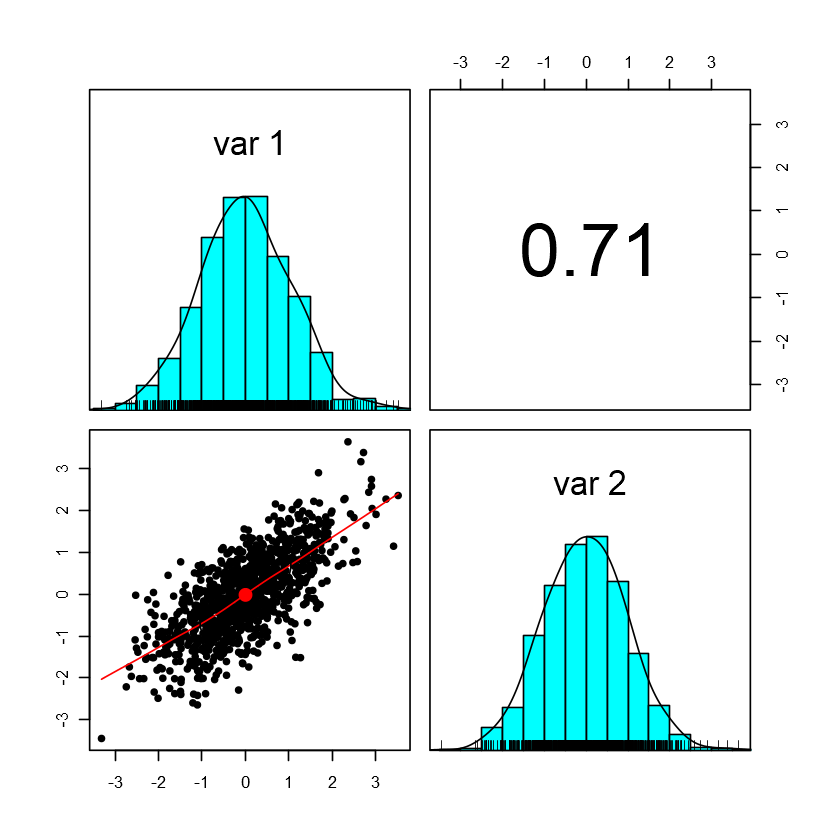

In [194]:
# the joint distribution between random continuous variables
library(MASS)
library(copula)
library(ggplot2)
set.seed(22)

n=1000

# for this example, generated random variables with correlation 0.7
s = matrix(c(1, 0.7,
             0.7, 1), 
           nrow=2) # correlation matrix

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
cor(z,method='spearman')
pairs.panels(z)

In the above plot, the histograms of random variables $X$ and $Y$, visualise their respective marginal distributions. The scatterplot, is the joint distribution for these variables. 

By the definition of a copula, it is a joint distribution of uniform marginal distributions. Thus, using probability transform, it can be seen that the marginal distributions are uniform and continuous between [0,1], $U$. 

$$ U = F(X) $$

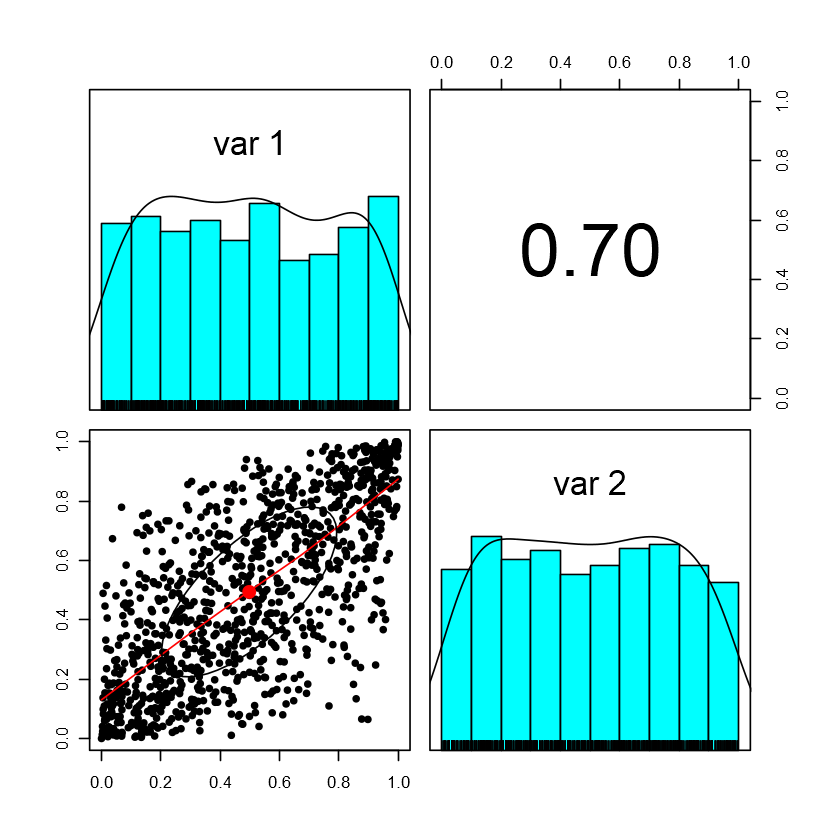

In [195]:
# probability transform of the marginal distribution

u <- pnorm(z) # probability cumulative distribution functions
pairs.panels(u)

It can be seen that transforming the marginal distributions, are uniform. The joint distribution for these distributions is the copula for the random variables $X$ and $Y$. This copula function contains the information on the dependence structure between random variables. It is able to separate the marginal distribution and the dependence structure.

Therefore, the copula $C$ of $X$ and $Y$ can be given as the joint distribution function of the uniform marginal distributions $U_x, U_y$

$$ C(u_x, u_y) = P[U_x \leq u_x, U_y \leq u_y] $$

These can be extended to multiple dimensions, and used for multivariate distributions. The flexibility of a copula, particularly makes it popular for use in risk modelling, as it can be used to model dependence in the tails of distributions. Additionally, another application is to construct families of multivariate distirbutions. 

# Fundamental Results

## Sklar's Theorem

Sklar's Theorem is fundamental for copulas, as it explains the role of copulas in the relationship between multivariate distribution functions and their marginal distributions. In general, it states that a joint distribution function is linked to a marginal distribution through a copula. Similarly, if there is a copula, or a collection of copulas, then there is also an associated marginal distribution. 

Theorem 2.3.3 in <a name="ref-2"/>[(Nelsen, 2007)](#cite-nelsen2007introduction):

Let $F(x)$ and $G(y)$ be a cumulative distribution function, 
$F(x,y)$ is a joint distribution function, with the margins $F$ and $G$
$$ F(x,y) = P(X \leq x | Y \leq y) $$

Sklar's Theorem states that the joint distribution is linked to marginal distributions through a copula $C$.

$$ F(x,y) = C (F(x), F(y)) $$

Additionally, if $F$ and $G$ are continuous, then the copula $C$ is unique, otherwise it is uniquely determined on RanF X RanG, where RanF and RanG denotes the range of the marginal distribution of F and G respectively.

Sklar's Theorem allows for the separation of the modelling of marginal distributions from the dependence structure, which is expressed in $C$, the copula. As can be seen in the previous example, despite the transformation of distribution to uniform, the correlation between the variables is maintained. Thus, when joint distribution becomes difficult, copulas maintain the dependence between the random variables and the marginal distribution is separately unaffected.

In [ ]:
#

## Properties of Copulas

There are certain properties which are required to determine whether a given joint distribution function is a copula. 

### Conditions of Copulas

The marginal distribution function of the joint probability distribution, is to be uniform and continuous, between [0,1].

The other conditions, that indicate whether a function is a copula are:

If $C$ is a copula and $u$ and $v$ are points in the domain.

1. The function is grounded. Thus, the copula is equal to 0 if any of the points is equal to zero.

$$ C(u,0) = 0 \\
C(0,v) = 0 $$

2. That the function has uniform margins. Inputs into the function includes 1, then it equals itself, either u or v.

$$C(u, 1) = u$$
$$C(1,v) = v$$

3. The function is non-decreasing. For example in a bivariate copula, the domain would be on I X I, equivalent to [0,1] X [0,1]. For $(u_1, v_1), (u_2, v_2)$, the volume is greater than or equal to zero.

$$C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1) \geq 0$$


Every function which satisfies these properties is a copula, and is extended to copulas with multiple dimensions.

### Independent Copulas

If random variables are completely independent, then its copula can be shown as the product of the marginal distribution functions, the independence copula.

$$ C(F(x), F(y)) = F(x)F(y)$$

To show that it is indeed a copula, this function satisfies the 3 conditions for a copula.

$$\Pi(u,v)=uv$$

In [ ]:
# I = [0,1], I^2 = [0,1] X [0,1]
u = 0
v = 1

u2 = 0
v2 = 1

# the independent copula
P = function(u, v){
    u*v
}

In [ ]:
#1) that it is grounded
P(0,v)
P(u,0)

In [ ]:
#2) It is uniform
P(u,1)
P(1,v)

In [ ]:
#3) It is an non-decreasing function
P(u2,v2) - P(u2,v) - P(u, v2) + P(u, v)

### The Frechet-Hoeffding Bounds

Other simple copulas are represented by the upper and lower bounds of copulas, known as the Frechet-Hoeffding bounds. It was found that a copula always lies in between a certain set of bounds. These bounds represent the extreme cases of dependency.

$$ max(u+v-1,0) \leq C(u) \leq min(u,v) $$

If the points of the domain form the vertices of a 3-dimensional cube, the copulas lie within these bounds. The following graphs visualise the minimum and maximum copulas.

In [ ]:
# minimum and maximum copulas
par(mfrow=c(1,2))

n=1000
# correlation matrix
s = matrix(c(1, 1,
             1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

#### Mimum Copula

The minimum copula represents full positive dependency between the variables.

$$ C(F(x), F(y)) = min(F(x), F(y))$$

To demonstrate this dependency 

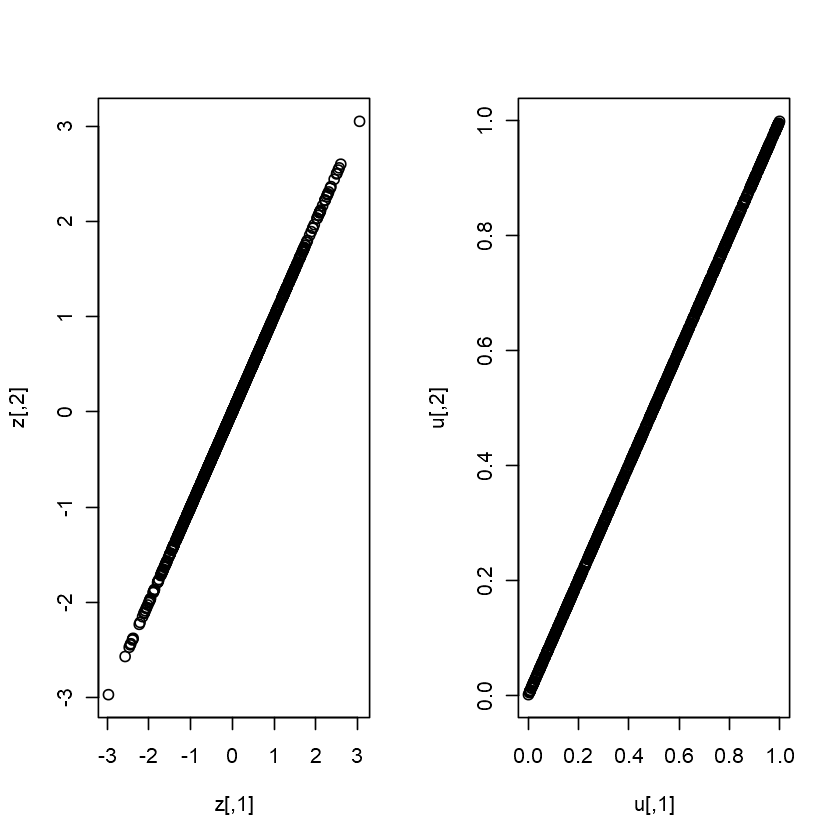

In [112]:
# generate a sample that is completely dependent
n=1000
# correlation matrix
s = matrix(c(1, 1,
             1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

par(mfrow=c(1,2))
plot(z) # the joint distribution of random variables
plot(u) # plot the joint distribution of uniform probability transform of the random variables


We can generate a Gaussian copula, with the dependence parameter of $\rho=0.99$ (very close to 1) and generate a sample from that copula. 

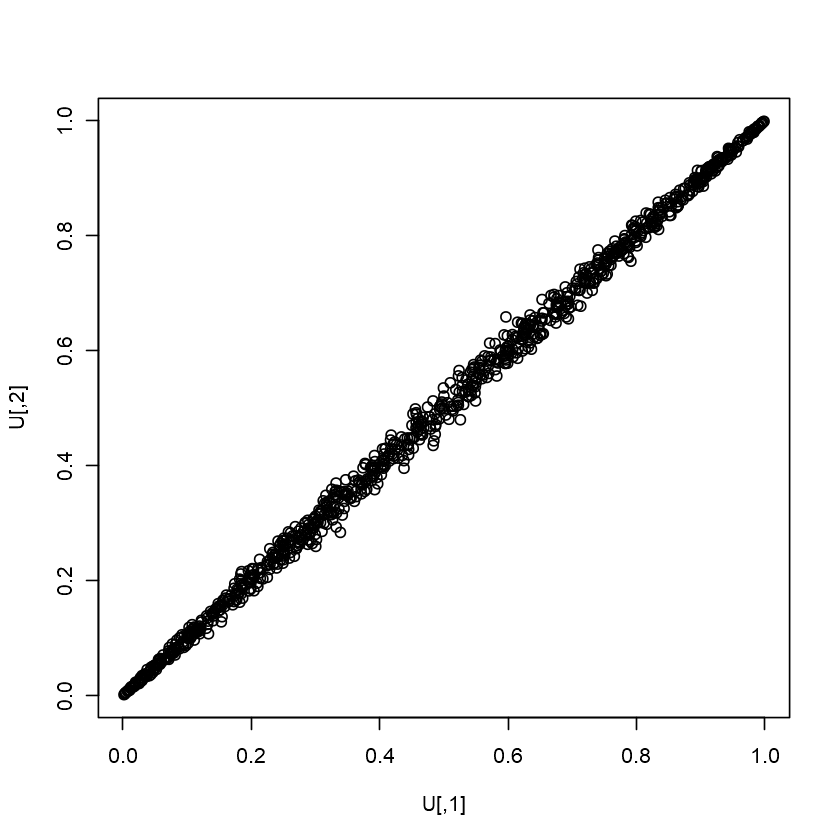

In [79]:
nc <- normalCopula(0.999)
U <- rCopula(n, copula=nc)
plot(U)

#### Maximum Copula

If a joint distribution is equal to the maximum bound, then the dependence is fully negative, suggesting that they are mutually exclusive. 

$$ C(F(x), F(y)) = max(F(x)+F(y)-1, 0)$$

Similarly, this is visualised in the following

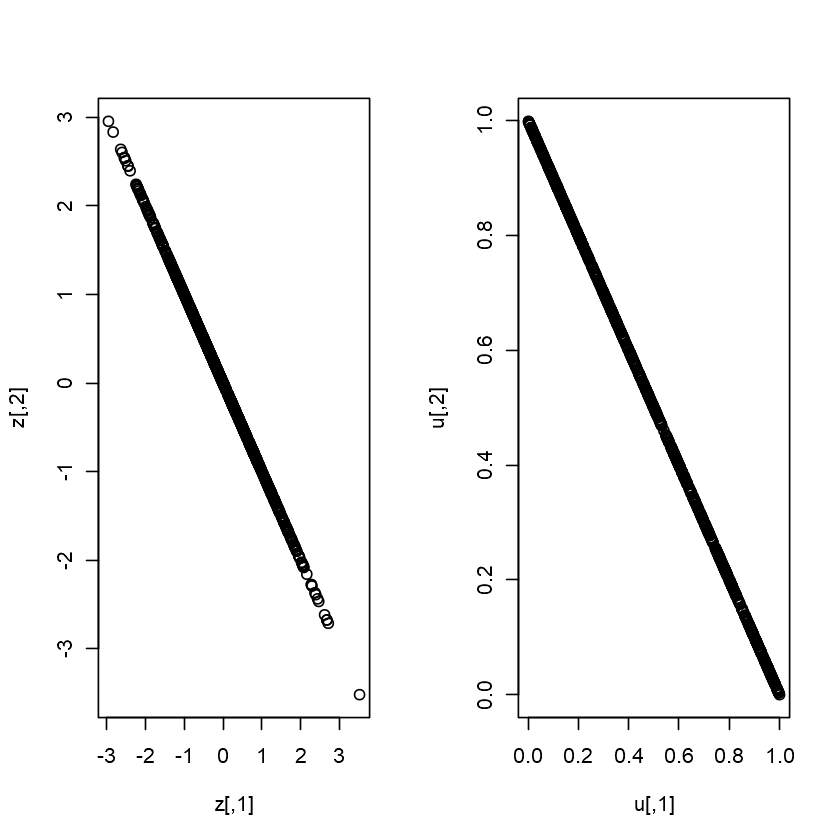

In [113]:
# generate a sample that is completely negatively dependent
n=1000
# correlation matrix
s = matrix(c(1, -1,
             -1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

par(mfrow=c(1,2))
plot(z) # the joint distribution of random variables
plot(u) # plot the joint distribution of uniform probability transform of the random variables


## Families of Copulas

Families of copulas model different dependencies between distributions. Implicit copulas are derived from multivariate distributions and include Gaussian copula and t-copula, both of elliptical family distributions.

For Gaussian copulas, independence between variables is related to a correlation of zero. Therefore, Gaussian copula, with parameter $\rho=0$, the copula is an independent copula.

We can demonstrate this by generating a Gaussian copula with this parameter. 

Additionally, $\rho=1$ is equal to the minimum bound and $\rho=-1$ is equal to the maximum bound. These are also visualised in the following. 

lower upper 
    0     0

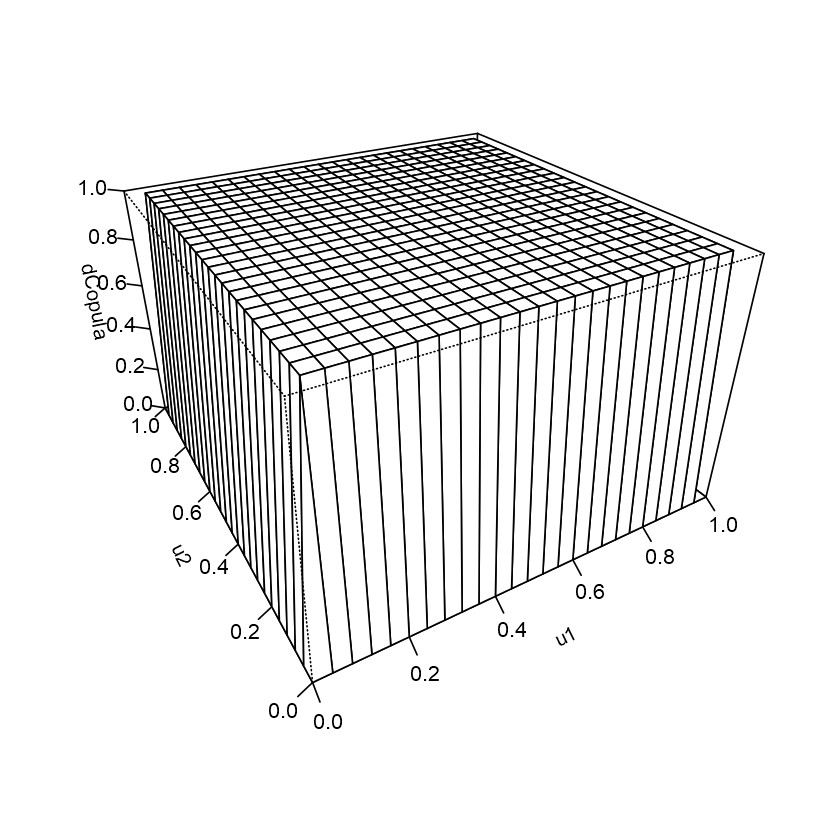

In [153]:
# generate a Gaussian copula with parameter rho=0 (an independent copula)
gauss_0 <- normalCopula(0)
persp(gauss_0, dCopula)

lambda(gauss_0)

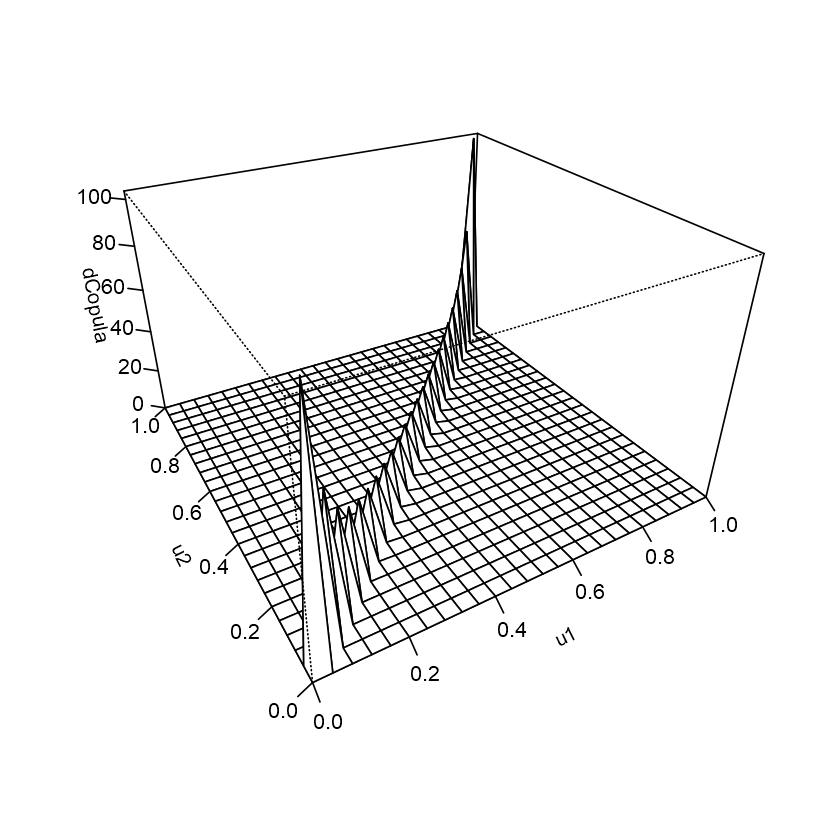

In [132]:
gauss_1 <- normalCopula(0.999)
persp(gauss_1, dCopula)

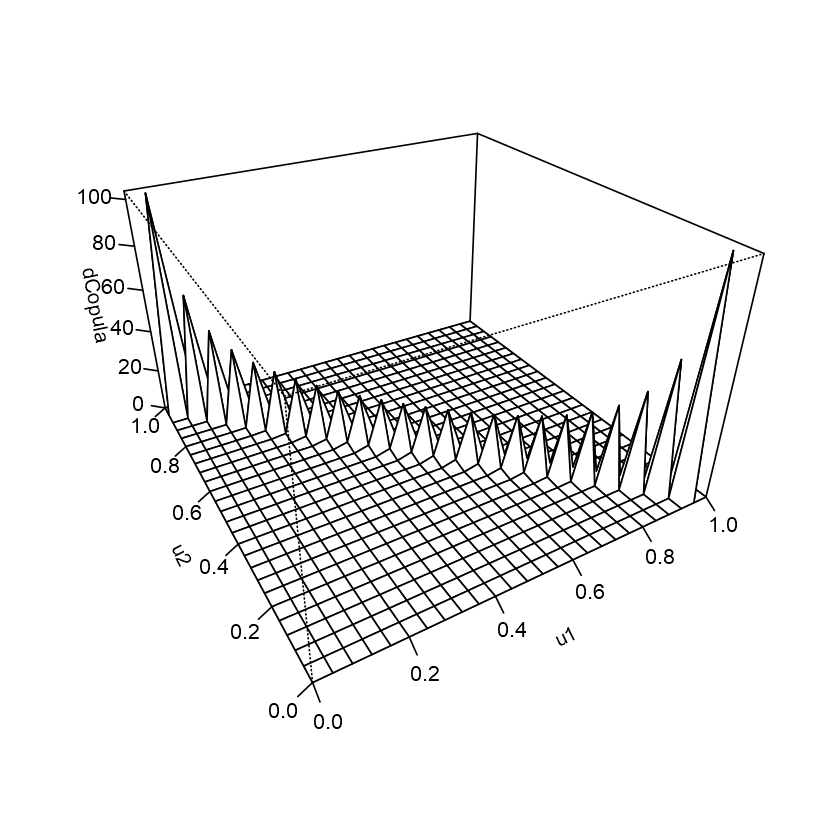

In [133]:
gauss_neg1 <- normalCopula(-0.999)
persp(gauss_neg1, dCopula)

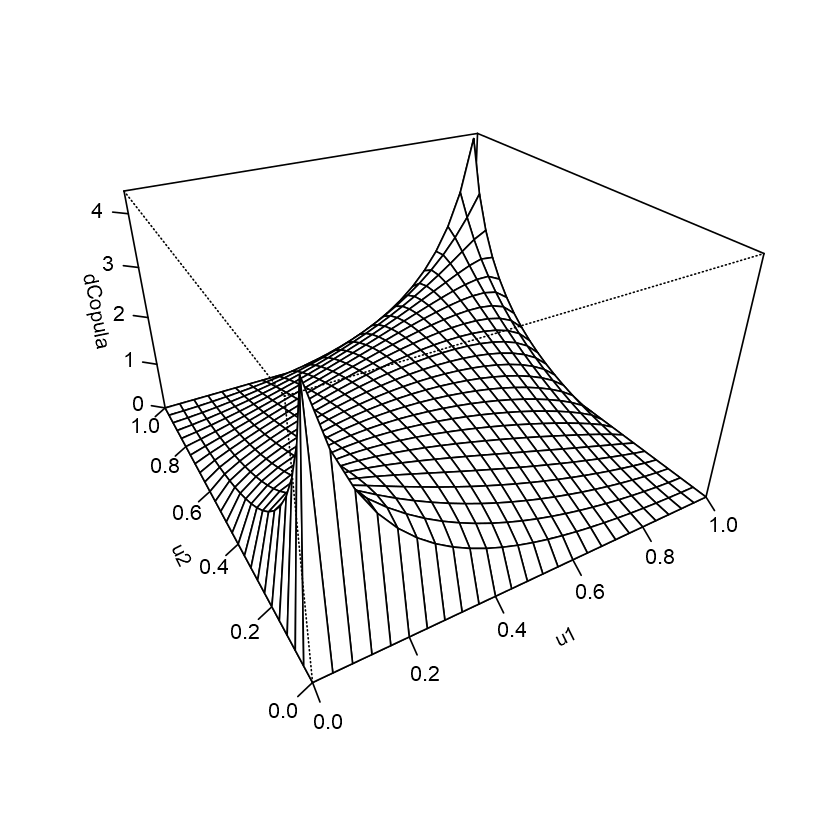

In [134]:
gauss_neg1 <- normalCopula(0.65)
persp(gauss_neg1, dCopula)

The density plots above visualise the dependence in a Gaussian copula. The copula is formed with the correlation parameter. In the first plot, the variables are completely independent, with very low uniform density throughout. The following plots, are the complete positive and negative dependence that is retained in the copula. 

For a t-copula, another parameter not just the correlation $\rho$ is important. The degrees of freedom is not included. Comonotonicity and countermonotocity remains at $\rho=1$ and $\rho=-1$, however $\rho=0$ does not result in a fully independent copula. Additionally, from the graph, compared to the Gaussian copula, there are peaks of higher density in the corners of the t-copula. This is associated with tail dependency modelled by the copula, that is not present in the Gaussian copula.

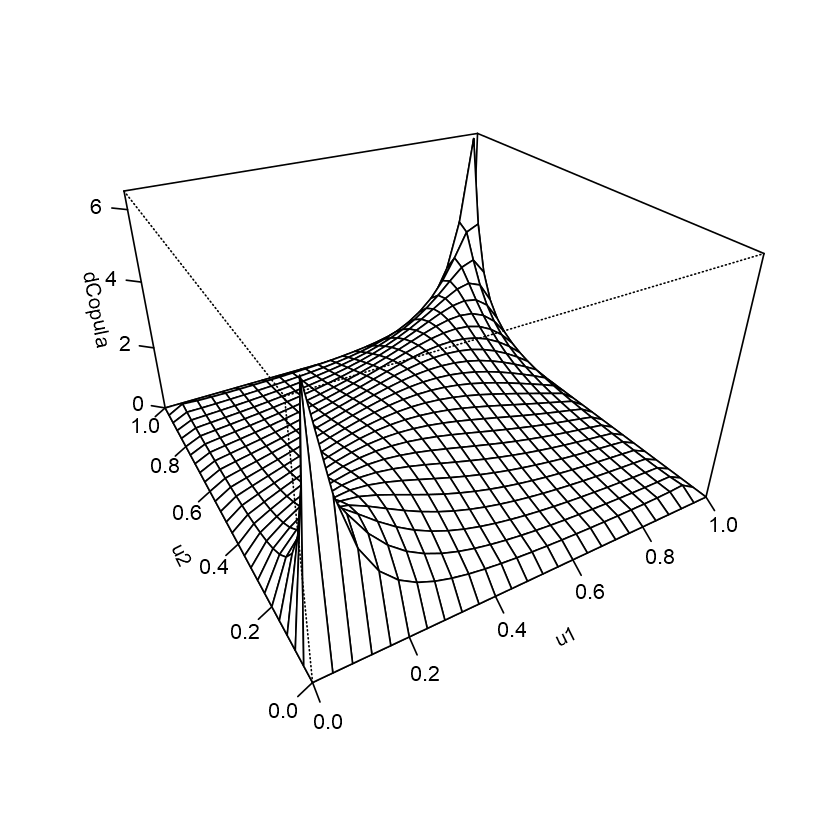

In [136]:
t_3 <- tCopula(0.65, df=3)
persp(t_3, dCopula)

Compared to the Gaussian copula, with the same correlation parameter of 0.65, the t-copula has higher densities on the corners of the plot. This is because t-copulas capture tail dependence compared to the Gaussian copula. 

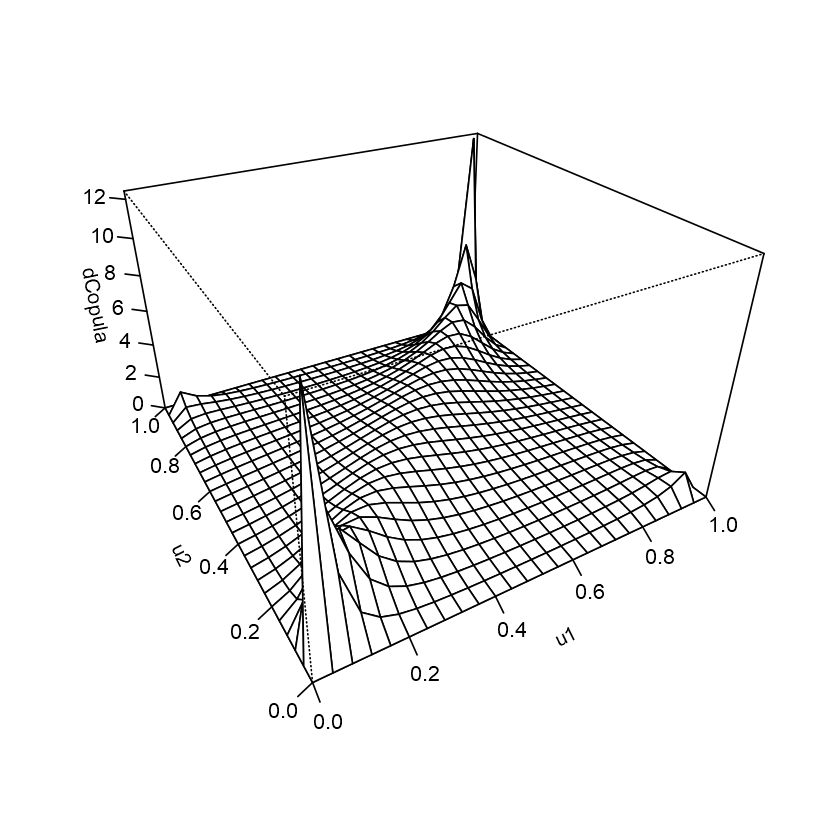

In [143]:
# changing the degrees of freedom parameter

t_6 <- tCopula(0.65, df=1)
persp(t_6, dCopula)

Both of these copulas are symmetrical. Dependency is equal on both sides, for example the tail dependency in the t-copula is equal on both upper and lower tails. Other family of copulas, particularly Archimedean copulas, provide models for asymmetric copulas.

### Archimedean Copulas

Archimedean coplulas can be stated as explicit copulas and not derived from multivariate distributions. The correlation parameter does not contribute to the model and typically only has one parameter $\theta$.

Clayton copula captures only lower tail dependence.

lower     upper 
0.7937005 0.0000000

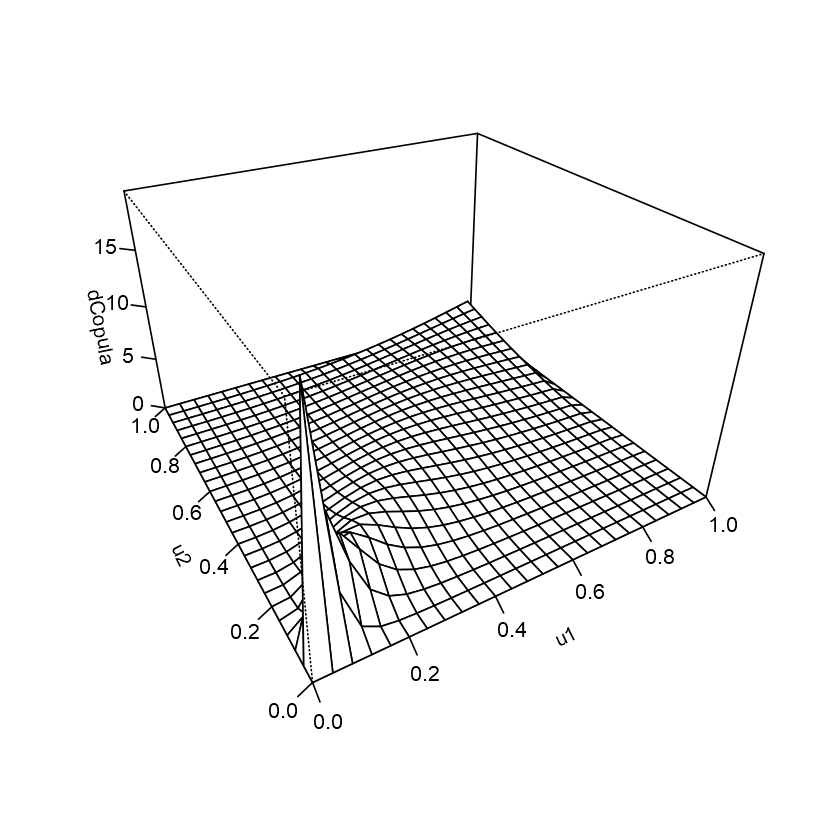

In [152]:
# Clayton copula

clayton <- claytonCopula(3)
persp(clayton, dCopula)

lambda(clayton) # tail dependence values

The Gumbel copula can be formulated as

$$C(u,v) = exp(-((-ln{u})^\theta + (-ln {v}) ^ \theta)^{1/\theta})$$

The plot below shows that it captures the upper tail dependence and no dependence in the lower tail.

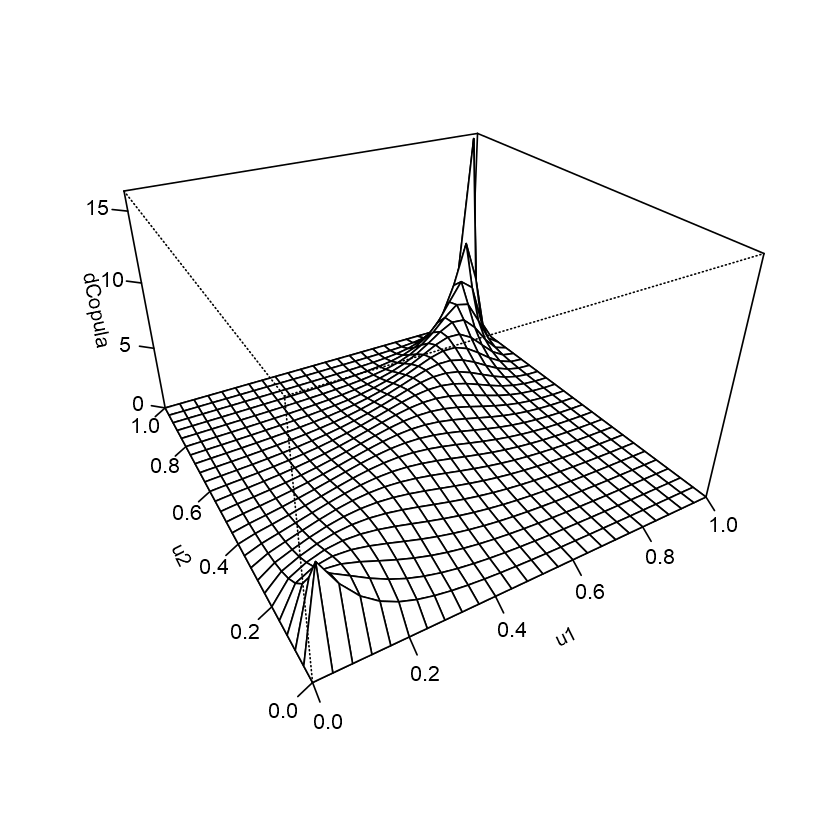

In [150]:
# Gumbel Copula

gumbel <- gumbelCopula(3)
persp(gumbel, dCopula)

lambda(gumbel)

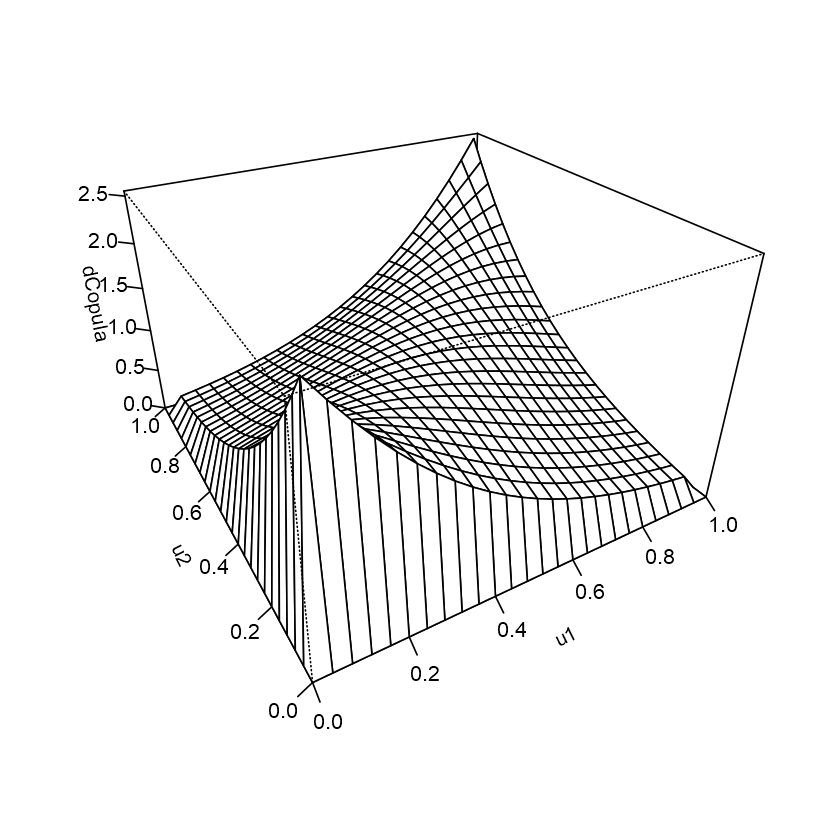

In [151]:
# Frank copula

frank <- frankCopula(3)
persp(frank, dCopula)

### Tail Dependence

One of the features of copulas is that is able to model tail dependence. Visually, the plots above indicate the different tail dependencies captured by different families of copulas.The density plots above, show the upper tail dependence on the upper corner of the plot, whereas the lower tail dependence is shown at the lower end, around the coordinates (0,0). For a bivariate copula $C$ with two uniform random marginal variables $U_1$ and $U_2$, the upper tail dependence means that large values of $U_1$ also have large values in $U_2$ and similarly in lower tail dependence.

The calculated coefficient, $\lambda$ is the coefficient for tail depedence. 



For random variables $X$ and $Y$ with distribution functions of $F$ and $G$, the coefficient for the upper tail dependence is the probability that Y is greater than the 100*t* percentile of $G$, given that $X$ is greater than the 100*t* precentile of $F$ as *t* approaches 1, where *t* is a given threshold.

Specifics in terms of quantile functions $G^{(-1)}(t) = y(t)$ and $F^{(-1)}(t) = x(t)$ follow.

the upper-tail dependence parameter $λ_U$ with reversed inequalities is defined as

$$λ_U = \lim_{t{\rightarrow 1^{-}}} \mathrm{Pr}[Y > y(t)\mid X > x(t)]\mbox{.}$$

The lower-tail dependence parameter $λ_L$ is defined as

$$λ_L = \lim_{t{\rightarrow 0^{+}}} \mathrm{Pr}[Y ≤ y(t)\mid X ≤ x(t)]\mbox{, and}$$

If the coefficient $\lambda_U > 0$ then the variables have upper tail dependence. If $\lambda_u = 0$, then the copula has no upper tail dependence. The slope of the copula when approaching the coordinates (0,0) or (1,1) also give a indication of its tail dependence, as a greater slope is associated with higher tail dependence. <a name="ref-3"/>[(Schmidt, 2007)](#cite-schmidt2007coping). 

The different copulas place greater weight on the dependence of tails. For example, the Gumbel copula has no lower tail dependence, but strong upper tail dependence, for any value of the $\theta$ parameter.

In [159]:
gumbel <- gumbelCopula(5)
lambda(gumbel)

lower     upper 
0.0000000 0.8513016

This is the opposite in Clayton Copulas. While changing the parameter, changes the strength of the depdence, there is no upper tail dependence shown. 

In [160]:
clayton <- claytonCopula(5)
lambda(clayton)

lower     upper 
0.8705506 0.0000000

## Applications

### Financial Risk Management

Because of their flexibility in showing relationships that are inconsistent throught the model, copulas are useful for modelling, for example, financial risk. Traditional correlation measures do not capture tail dependence, unlike copulas. And in financial risk, extreme events can lead to large losses and thus, despite their low probability occuring, the dependence of these extreme events occuring can be seen using copulas. For example, in credit risk, tail dependence would be associated with the probability that a borrower exceeds a threshold, given that another borrower exceeds a threshold and resulting in excessive losses. Copulas provide a way to investigate these problems. <a name="ref-4"/>[(Kole, Koedijk and Verbeek, 2007)](#cite-kole2007selecting)


### Neuronal Spike Dependencies

Another less widely used application, is in the field of Neuroscience. There are a few studies which have used copulas for EEG data, to investigate neuronal spike rates and dependence between neuron activity. It is mentioned that there are few ways to model the neuron spike dependencies and may sometimes be ignored to treat the responses as independent <a name="ref-5"/>[(Berkes, Wood and Pillow, 2008)](#cite-berkes2008characterizing). Some studies have used copulas in neuroscience to bridge this gap and model complicated dependencies in the data.

<a name="ref-6"/>[(Berkes, Wood and Pillow, 2008)](#cite-berkes2008characterizing) study, constructed non-independent joint distributions of neuron firing rates using copulas. The authors chose to use construct copulas, because there is known strong dependencies between neurons. However, because of their Poisson distribution there are limited multivariate generalisation for the data. Their study used bivariate copulas, as it modelled dependence between pairs of neurons. This study explored a variety of copula models for joint neural response distributions between the pairs of neurons. Their results indicated that there was dependency between firing rate distributions, concentrated in the lower and upper tails. 

Another study, <a name="ref-7"/>[(Iyengar, Dauwels, Varshney and Cichocki, 2010)](#cite-iyengar2010quantifying) also used copulas to investigate interchannel dependence in EEG signals, using specifically Gaussian copula and t-copula. The authors emphasise the importance of choosing the appropriate copula model for the data. It is highlighted that copulas used in this way may be able to detect a change in the synchrony of EEG channels, which is useful in detecting things such as, Alzheimer's Disease and epileptic seizures. 

Both of these studies, indicate the possibilities of using copulas when studying neuron and EEG dependencies due to their properties of multivariate joint probability and dependence. However, it is also mentioned that further exploration is required for using copulas in this way.

# Conclusions

Copulas provide a way to study the dependence between random variables and model joint multivariate distributions. This has been particularly useful in model risk management because of the particular properties of copulas. This includes, modelling tail dependencies and extreme values and high dimensions, which is difficult to capture when using correlations. Further from this report, a greater detailed understanding of the various families of copulas and their applications, as well as the measures of dependence.

<!--bibtex

@article{berkes2008characterizing,
  title={Characterizing neural dependencies with copula models},
  author={Berkes, Pietro and Wood, Frank and Pillow, Jonathan},
  journal={Advances in neural information processing systems},
  volume={21},
  pages={129--136},
  year={2008}
}

@book{nelsen2007introduction,
  title={An introduction to copulas},
  author={Nelsen, Roger B},
  year={2007},
  publisher={Springer Science \& Business Media}
}

@article{schmidt2007coping,
  title={Coping with copulas},
  author={Schmidt, Thorsten},
  journal={Copulas-From theory to application in finance},
  volume={3},
  pages={34},
  year={2007}
}

@article{kole2007selecting,
  title={Selecting copulas for risk management},
  author={Kole, Erik and Koedijk, Kees and Verbeek, Marno},
  journal={Journal of Banking \& Finance},
  volume={31},
  number={8},
  pages={2405--2423},
  year={2007},
  publisher={Elsevier}
}

@inproceedings{iyengar2010quantifying,
  title={Quantifying EEG synchrony using copulas},
  author={Iyengar, Satish G and Dauwels, Justin and Varshney, Pramod K and Cichocki, Andrzej},
  booktitle={2010 IEEE International Conference on Acoustics, Speech and Signal Processing},
  pages={505--508},
  year={2010},
  organization={IEEE}
}

-->

# References

<a name="cite-nelsen2007introduction"/><sup>[^](#ref-1) [^](#ref-2) </sup>Nelsen, Roger B. 2007. _An introduction to copulas_.

<a name="cite-schmidt2007coping"/><sup>[^](#ref-3) </sup>Schmidt, Thorsten. 2007. _Coping with copulas_.

<a name="cite-kole2007selecting"/><sup>[^](#ref-4) </sup>Kole, Erik and Koedijk, Kees and Verbeek, Marno. 2007. _Selecting copulas for risk management_.

<a name="cite-berkes2008characterizing"/><sup>[^](#ref-5) [^](#ref-6) </sup>Berkes, Pietro and Wood, Frank and Pillow, Jonathan. 2008. _Characterizing neural dependencies with copula models_.

<a name="cite-iyengar2010quantifying"/><sup>[^](#ref-7) </sup>Iyengar, Satish G and Dauwels, Justin and Varshney, Pramod K and Cichocki, Andrzej. 2010. _Quantifying EEG synchrony using copulas_.

